# Linear Stability Analysis

A two dimensional linear system can be written as
\begin{align}
    \dot x &= ax + by,\\
    \dot y &= cx + dy,
\end{align}
or, equivalently,
\begin{equation}
    \dot{\vec{x}} = \mathbf{A} \vec x =     
    \left[ 
     \begin{array}{c}
            \dot x \\ \dot y
     \end{array} 
     \right] = 
    \begin{bmatrix}
        a & b \\
        c & d
    \end{bmatrix}
        \left[ 
     \begin{array}{c}
            x \\ y
     \end{array} 
     \right].
\end{equation}

As you could suspect, all the solutions properties are encoded inside the matrix $A$. Fixed points occur wehenever $\dot{\vec x} = \vec 0$. From the definition, $(0, 0)$ is always a fixed point. In the case of the harmonic oscillator, the origin is called a focus (since all orbits are around it but never touch it). For the damped harmonic oscillator, the origin is called an stable equilibrium point, snce it attracts all the trajectories in the phase plane. Soon we will learn more classifications.

Let's take a system where $a$ is arbitrary, $b = c = 0$, and $d = -1$. The solution for this systems is, clearly,
\begin{align}
    x(t) &= x_0e^{at},\\ 
    y(t) &= y_0 e^{-t}.
\end{align}
Let's plot the phase portrait for several key values for $a$.

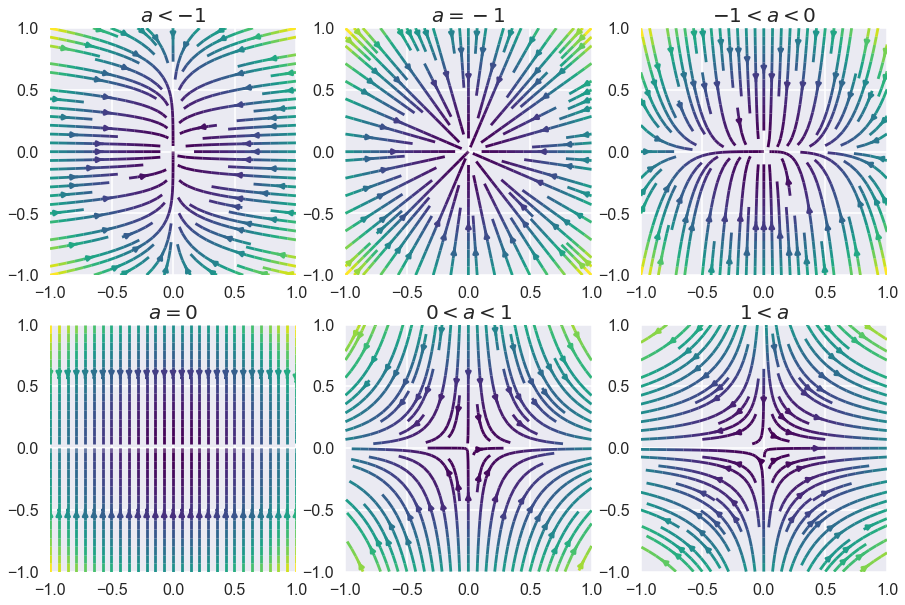

In [2]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('poster')

fig, axes = plt.subplots(2, 3, figsize=(15,10))
# function to return the derivatives
def derivatives(state, A = 1.0, t=0): 
    xd  = A*state[0]
    yd = -state[1]
    return [xd, yd]

N = 30
MIN = -1.0
MAX = 1.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
E = X*X + Y*Y

A = [-5.0, -1.0, -0.2, 0, 0.5, 1.5] 
L = [r"$a < -1$", r"$a = -1$", r"$-1 < a < 0$", r"$a = 0$", r"$0 < a < 1$", r"$1 < a$"]
for iA in range(len(A)) :
    DX, DY = derivatives([X, Y], A[iA])
    axes[int(iA/3), iA%3].streamplot(X, Y, DX, DY, color=E, cmap='viridis')
    axes[int(iA/3), iA%3].set_xlim(MIN, MAX)
    axes[int(iA/3), iA%3].set_ylim(MIN, MAX)
    axes[int(iA/3), iA%3].set_title(L[iA], fontsize=20)


For $a<-1$, we have a **stable node**, and you can see that $x$ decays faster to zero than $y$. When $a = -1$, we have a very symmetrical case where both decaying rates are the same: the equilibrium point is called a **star**. When $-1 < a < 0$ we again have a stable node at the origin, but now the solutions decays faster along the $y$ direction. When $a=0$, $x$ does not change at all ,$x(t) = x_0$, and we have a family of stable nodes along the $x$-axis, or a **line of fixed points**. Finally, when $a > 0$, most trajectories are unstable and diverge to infinity, except for those where $x = 0$, the $y$ axis, they go to the origin. Here, the origin is called a **saddle-point**. 

It is possible to show that the solution to the previous matrix system of differential equations depends completely on the eigenvalues of the matrix (Do it by replacing an exponential anzats). For a two dimensonal system, the characteristic equation bring us to the following expression for the eigen-value: $\lambda^2 - \tau\lambda + \Delta = 0$, where $\tau = tr(A)$ and $\Delta = \det (A) = ad - bc$. Therefore, we have two roots:
\begin{align}
    \lambda_1 =& \frac{\tau + \sqrt{\tau^2 - 4\Delta}}{2}, \\
    \lambda_2 =& \frac{\tau - \sqrt{\tau^2 - 4\Delta}}{2}.
\end{align}
If the eigen-values are distinc, the eigen-vectors are independent, and we have 
\begin{align}
    \vec x(t) &= c_1e^{\lambda_1 t}\vec{v_1} + c_2 e^{\lambda_2 t}\vec{v_2}, \\
    \vec{x_0} &= c_1\vec{v_1} + c_2\vec{v_2}.
\end{align}



But, sometimes, you are more interested on the general behavior of the solutions, instead of solving exactly the problem. For instance, the previous example showed that the eigen-directions actually reflect some important long-term behavior for the system. The phase-plane portrait of it is

(-3.1, 3.1)

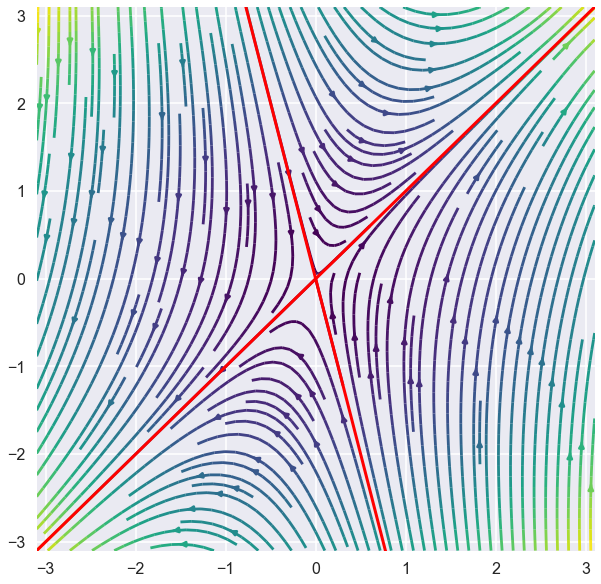

In [9]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10,10))
# function to return the derivatives
def derivatives(state, A=np.eye(2), t=0): 
    xd = state[0] + state[1]
    yd = 4*state[0] - 2*state[1]
    return [xd, yd]

N = 20
MIN = -3.1
MAX = 3.1
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
E = X*X + Y*Y

A = np.array([[1., 1.], [4., -2.]])
DX, DY = derivatives([X, Y], A)
ax.streamplot(X, Y, DX, DY, color=E, cmap='viridis', density=1.8)
x = np.linspace(MIN, MAX, 50)
ax.plot(x, x, lw=3, c='red')
ax.plot(x, -4*x, lw=3, c='red')
ax.set_xlim(MIN, MAX)
ax.set_ylim(MIN, MAX)

As you can see here, the eigen-vectors show the so-called stable and unstable manifolds, which are trayectories going to or diverging from the stable point. In this case, the first eigen-vector shows the diverging direction. The origin is a saddle point. 

> **NOTE**: If the eigen-values are complex, the nodes are either **centers** (closed curves around), or **spirals**.  Centers are neutrally stable, since they do not attract or repel trayectories, while spiral can be stable or unstable.

According to the discriminant of the general linear system, you can have the following (see Strogatz): 

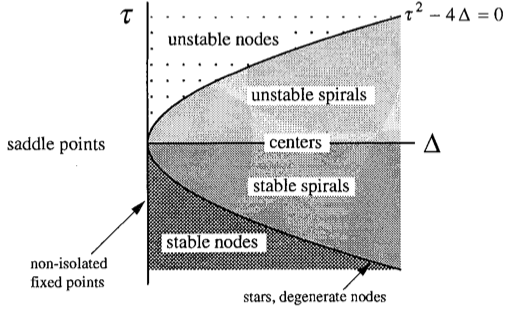

In [31]:
from IPython.display import Image
Image(filename='LinearSystems-Strogatz.png')

# **Exercise** 
Compute the phase portrait for the system described by $a = 1, b=2, c = 3, d = 4$ and compute and plot the eigenvectors in the same figure. Classify the fixed points.

(-3.1, 3.1)

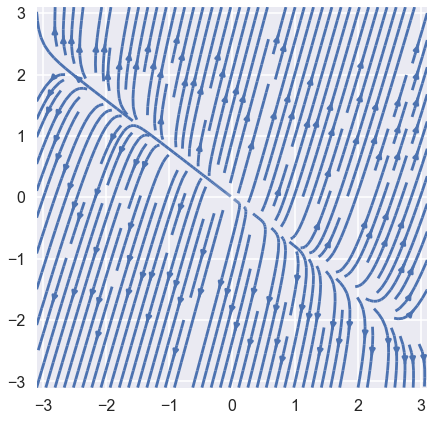

In [11]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(7,7))
# function to return the derivatives
def derivatives(state, A=np.eye(2), t=0): 
    xd = 1*state[0] + 1*state[1]
    yd = 3*state[0] + 4*state[1]
    return [xd, yd]

N = 30
MIN = -3.1
MAX = 3.1
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))

A = np.array([[1., 1.], [4., -2.]])
DX, DY = derivatives([X, Y], A)
ax.streamplot(X, Y, DX, DY, density=1.5)
x = np.linspace(MIN, MAX, 50)
ax.set_xlim(MIN, MAX)
ax.set_ylim(MIN, MAX)

# Exercises
These exercises come from the book "A FIRST COURSE IN DIFFERENTIAL EQUATIONS FOR SCIENTISTS AND ENGINEERS, RUSSELL L. HERMAN", which is freely available at http://people.uncw.edu/hermanr/mat361/odebook . 

<img src="fig/phase-portrait-01.png">

<img src="fig/phase-portrait-02.png">

<img src="fig/phase-portrait-03.png">